In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib notebook
import numpy as np
import pandas as pd
from loudspeaker_box import main, open_box, utils
import IPython.display as disp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
xticks = [2,4,8,16,31.5, 63, 125, 250, 500, 1000,2000,4000 ,8000]

In [2]:
fs  = 47.2
Vas = 25.4
Re  = 3.37
Qms = 3.6
Qts = 0.27

In [3]:
Vb1 = 11.0 #Litros
Vb2 = 20.5 #Litros
L1 = 260.0
L2 = 70.0
D1 = 68.0
D2 = 68.0

In [4]:
a1 = Vas/Vb1
a2 = Vas/Vb2
s1 = open_box.S_p(D1/2)
s2 = open_box.S_p(D2/2)
Map1 = open_box.M_aT(s1,L1)
Map2 = open_box.M_aT(s2,L2)
Cab1 = open_box.C_ab(Vb1)
Cab2 = open_box.C_ab(Vb2)
print('a1 =',np.around(a1,2),'; a2 =',np.around(a2,2))

a1 = 2.31 ; a2 = 1.24


In [5]:
def T2(Map,Cab):
    return Map*Cab

In [6]:
Tb1 = T2(Map1,Cab1)
Tb2 = T2(Map2,Cab2)
wb1 = 1/Tb1
wb2 = 1/Tb2
f1 = np.sqrt(wb1)/(2*np.pi)
f2 = np.sqrt(wb2)/(2*np.pi)
print('f1 =',np.around(f1,1),'; f2 =',np.around(f2,1))

f1 = 56.3 ; f2 = 66.2


In [7]:
def QES(Qms,Qts):
    num = Qms*Qts
    den = (Qms-Qts)
    return num/den

In [8]:
Qes = QES(Qms,Qts)

In [16]:
class Ze:
    def __init__(self,Re,Qms,Qes,fs,f1,f2,a1,a2):
        self.w   = 2*np.pi*np.linspace(1,22050,100000)
        self.Re  = Re
        self.Qms = Qms
        self.Qes = Qes
        self.Ts  = 1/(2.*np.pi*fs)
        self.Tb1 = 1/(2.*np.pi*f1)
        self.Tb2 = 1/(2.*np.pi*f2)
        self.a1  = a1
        self.a2  = a2
    
    def t1(self):
        self.T1 = self.Ts/self.Qms
    
    def t2(self):
        t21 = (self.Ts**2)
        t22 = (1+self.a1)*(self.Tb1**2)
        t23 = ((1+self.a2/self.a1)*(self.Tb2**2))
        self.T2 = t21+t22+t23
        
    def t3(self):
        fac     = self.Ts/self.Qms
        fac1    = 1 + self.a2/self.a1
        t31     = fac*fac1*self.Tb2**2
        t32     = fac*self.Tb1**2
        self.T3 = t31+t32
        
    def t4(self):
        t41 = (self.Ts**2)*(self.Tb1**2)
        t42 = (self.Ts**2)*(self.Tb2**2)*(1+(self.a2/self.a1))
        t43 = (self.Tb1**2)*(self.Tb2**2)*(1+self.a1+self.a2)
        self.T4 = t41+t42+t43
        
    def t5(self):
        fac     = self.Ts/self.Qms
        self.T5 = fac*(self.Tb2**2)*(self.Tb1**2)
        
    def t6(self):
        self.T6 = (self.Tb1**2)*(self.Tb2**2)*(self.Ts**2)
        
    def ZE(self):
        self.t1()
        self.t2()
        self.t3()
        self.t4()
        self.t5()
        self.t6()
        num = self.Qms*self.T5*(self.w**5)*1.j - self.Qms*self.T3*(self.w**3)*1.j + self.Qms*self.T1*self.w*1.j
        den = -self.T6*(self.w**6) + self.T5*(self.w**5)*1.j + self.T4*(self.w**4) - self.T3*(self.w**3)*1.j - self.T2*(self.w**2) + self.T1*self.w*1.j + 1 
        self.Z = self.Re*(1+(num/(self.Qes*den)))

In [21]:
type2 = Ze(4.7,Qms,Qes,fs,f1,f2,a1,a2)
type2.ZE()
ZE = type1.Z
f = type1.w/(2*np.pi)

(10.0, 1000.0)

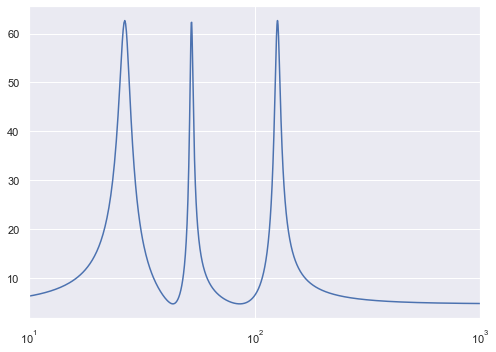

In [22]:
fig, ax = plt.subplots(figsize = (7,5),tight_layout=True)
ax.plot(f,np.abs(ZE))
ax.set_xscale('log')
ax.set_xlim([1e1,1e3])

In [12]:
np.abs(ZE[0])

4.71439769545793